<a href="https://colab.research.google.com/github/Muhammad-Ahtasham/Learnings/blob/master/Convolutional_Nureal_Networks_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
print(f"The size of train samples {X_train.shape},\nAnd Test Samples{X_test.shape}")

The size of train samples (50000, 32, 32, 3),
And Test Samples(10000, 32, 32, 3)


In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

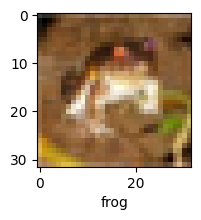

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train, 0)

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### First Building With Simple ANN

### ==> if we have a value then we use sparse categorical cross entropy and if we have one hot encoded output we use categorical cross entropy

In [10]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3024 - loss: 1.9346
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4165 - loss: 1.6479
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4553 - loss: 1.5438
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4762 - loss: 1.4863
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4955 - loss: 1.4395
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5104 - loss: 1.3868
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5269 - loss: 1.3508
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5364 - loss: 1.3210
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5496 - loss: 1.2799
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5577 - loss: 1.2633
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5736 - loss: 1.2206
Epoch 12/20
1563/1563 ━━━━━━━━

In [11]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.44      0.54      1000
           1       0.76      0.58      0.66      1000
           2       0.30      0.69      0.42      1000
           3       0.42      0.31      0.36      1000
           4       0.56      0.30      0.39      1000
           5       0.49      0.40      0.44      1000
           6       0.65      0.53      0.58      1000
           7       0.46      0.76      0.57      1000
           8       0.73      0.64      0.68      1000
           9       0.67      0.56      0.61      1000

    accuracy                           0.52     10000
   macro avg       0.57      0.52      0.53     10000
weighted avg       0.57      0.52      0.53     10000



### Now using Convolutional Layers

In [12]:
cnn = models.Sequential([
    # CNN Layers
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',      input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Dense Network
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=20)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.4179 - loss: 1.5832
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6617 - loss: 0.9649
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7605 - loss: 0.6888
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8438 - loss: 0.4478
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9099 - loss: 0.2619
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9504 - loss: 0.1477
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9621 - loss: 0.1108
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9704 - loss: 0.0914
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9724 - loss: 0.0834
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9762 - loss: 0.0733
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9785 - loss: 0.0700
Epoch 12/20
1563/1563 ━

In [13]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6899 - loss: 2.4608


[2.5398716926574707, 0.684499979019165]

In [15]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

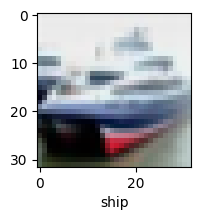

In [17]:
plot_sample(X_test, y_test, 1)

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[1.0067638e-11, 2.9740024e-08, 8.4837337e-09, 9.7181398e-01,
        9.7973202e-07, 2.8169783e-02, 1.5240513e-05, 2.5185818e-09,
        6.2006639e-10, 3.0903604e-09],
       [1.9073419e-10, 1.1968268e-12, 1.6095527e-22, 6.6266169e-22,
        6.0192466e-26, 4.7964519e-27, 7.2924467e-23, 3.4162139e-26,
        1.0000000e+00, 1.0873346e-14],
       [1.2122628e-03, 6.8061439e-05, 2.3944835e-06, 3.5488631e-07,
        1.2725268e-03, 2.2949133e-07, 1.0430395e-07, 1.4452175e-06,
        9.9322116e-01, 4.2215073e-03],
       [1.0000000e+00, 2.3433232e-15, 5.5087415e-09, 2.2894913e-14,
        5.8010339e-14, 5.4289476e-16, 1.2463132e-12, 3.8631099e-12,
        8.5365576e-11, 1.4722947e-14],
       [2.2984271e-14, 1.0397738e-13, 1.9855424e-05, 3.3883063e-07,
        9.1427338e-01, 8.5706346e-02, 1.3862099e-07, 8.4964896e-11,
        5.3064425e-14, 1.9667157e-16]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [23]:
print(f"Classification Report\n{classification_report(y_test, y_classes)}")

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1000
           1       0.84      0.76      0.80      1000
           2       0.57      0.60      0.58      1000
           3       0.49      0.49      0.49      1000
           4       0.66      0.61      0.63      1000
           5       0.57      0.59      0.58      1000
           6       0.82      0.67      0.73      1000
           7       0.70      0.76      0.73      1000
           8       0.77      0.83      0.80      1000
           9       0.73      0.80      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [25]:
cm = confusion_matrix(y_test, y_classes)

print(f"Confusion Matrix\n{cm}")

Confusion Matrix
[[749  14  41  24  27   9   5  12  79  40]
 [ 17 755  11  16   8   6   9  10  42 126]
 [ 65   7 596  62  80  72  31  53  17  17]
 [ 32  12  83 493  73 161  45  57  20  24]
 [ 21   5  89  81 611  54  25  90  11  13]
 [ 18   3  68 176  31 587  17  68  16  16]
 [  7  14  92  79  48  59 665  12  16   8]
 [ 17  10  32  37  39  69   4 759   8  25]
 [ 64  19  21  10   8   9   5   5 831  28]
 [ 25  57  20  29   4  12   4  16  34 799]]


Text(0.5, 3.722222222222216, 'Predicted')

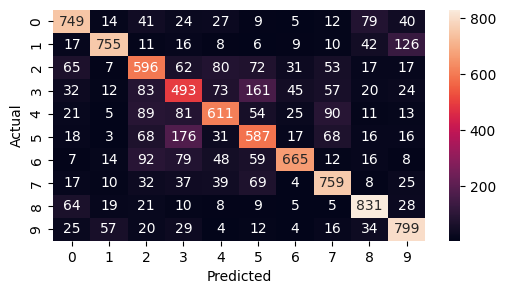

In [28]:
import seaborn as sn
plt.figure(figsize = (6,3))
sn.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')